<a href="https://colab.research.google.com/github/sumyuck/ML-learning/blob/main/nlc/NLC_p_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
#Tensors

data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(f"Tensor  : \n {x_data} \n")

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f"Tensor  : \n {x_np} \n")

x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

#Attributes of Tensors

tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}\n")

#Operations on Tensors

tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)
print("\n")

# This computes the matrix multiplication between two tensors
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)
print(f"y3 : {y3}")
print("\n")


# This computes the element-wise product
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print(f"z3 : {z3}")
print("\n")

agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))
print("\n")

print(f"{tensor} \n")
tensor.add_(5)
print(tensor)
print("\n")

Tensor  : 
 tensor([[1, 2],
        [3, 4]]) 

Tensor  : 
 tensor([[1, 2],
        [3, 4]]) 

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0230, 0.2833],
        [0.6871, 0.6731]]) 

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


y3 : tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


z3 : tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


12.0 <class 'float'>


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])




In [ ]:
#Datasets & DataLoaders

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

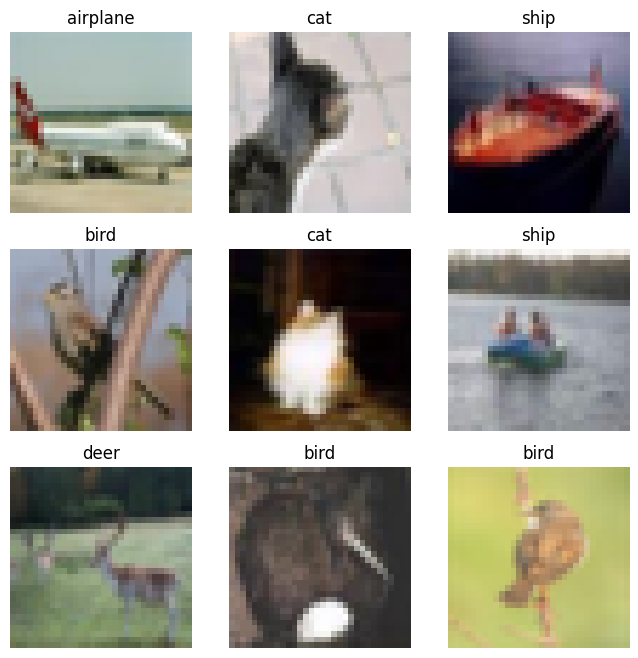

In [ ]:
#Iterating and Visualizing the Dataset

labels_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
#Creating a Custom Dataset

import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
#Preparing data for training with DataLoaders

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


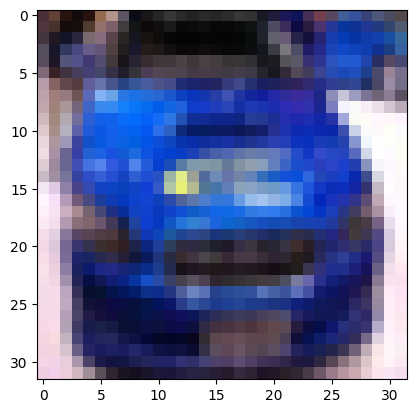

Label: automobile


In [ ]:
#Iterate through the DataLoader

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].permute(1, 2, 0)
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {labels_map[label.item()]}")

In [ ]:
#Transforms

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [ ]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [ ]:
#Neural Network

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
#Accelerator

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
#Define Class

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*32*32, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2])


In [ ]:
#Model Layers

input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:
#nn.Flatten

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [ ]:
#nn.Linear

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [ ]:
#nn.RELU

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.3252,  0.3535,  0.0180, -0.5734,  0.0733, -0.0079, -0.0058,  0.2859,
         -0.4744,  0.3561, -0.0040, -0.2546,  0.5743,  0.2391,  0.0601,  0.0741,
         -0.0857,  0.4361,  0.1879,  0.3174],
        [ 0.1104,  0.1336,  0.1282, -0.2349,  0.6556, -0.0250,  0.1069,  0.0420,
         -0.3319,  0.4635, -0.3697, -0.4220,  0.1581,  0.5151,  0.3773, -0.0441,
         -0.0973, -0.1422, -0.3026,  0.3242],
        [-0.2663,  0.2918, -0.0890, -0.2832,  0.2453,  0.1270,  0.4405,  0.0620,
         -0.8707,  0.4226, -0.3215, -0.3512,  0.4605,  0.2629,  0.3138,  0.1637,
         -0.1925, -0.1392,  0.1394,  0.3315]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.3535, 0.0180, 0.0000, 0.0733, 0.0000, 0.0000, 0.2859, 0.0000,
         0.3561, 0.0000, 0.0000, 0.5743, 0.2391, 0.0601, 0.0741, 0.0000, 0.4361,
         0.1879, 0.3174],
        [0.1104, 0.1336, 0.1282, 0.0000, 0.6556, 0.0000, 0.1069, 0.0420, 0.0000,
         0.4635, 0.0000, 0.0000, 0.1581, 0.5151, 0.37

In [ ]:
#nn.Sequential

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [ ]:
#nn.SoftMax

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [ ]:
#Model Parameters

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 3072]) | Values : tensor([[-0.0165, -0.0089,  0.0002,  ..., -0.0149,  0.0146, -0.0089],
        [-0.0032,  0.0154, -0.0165,  ...,  0.0074, -0.0125, -0.0077]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0063, 0.0179], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0331,  0.0104, -0.0397,  ...,  0.0289, -0.0188, -0.0153],
        [ 0.0198,  0.0402, -0.0232,  ..., -0.0319,  0.0317,  0.0097]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

In [ ]:
#Optimizing Model Parameters

learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
#Implementation

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    model.train()
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297247  [   64/50000]
loss: 2.303860  [ 6464/50000]
loss: 2.289443  [12864/50000]
loss: 2.282402  [19264/50000]
loss: 2.279820  [25664/50000]
loss: 2.271084  [32064/50000]
loss: 2.277394  [38464/50000]
loss: 2.267853  [44864/50000]
Test Error: 
 Accuracy: 14.6%, Avg loss: 2.268806 

Epoch 2
-------------------------------
loss: 2.255388  [   64/50000]
loss: 2.246287  [ 6464/50000]
loss: 2.263666  [12864/50000]
loss: 2.267894  [19264/50000]
loss: 2.246803  [25664/50000]
loss: 2.199228  [32064/50000]
loss: 2.217363  [38464/50000]
loss: 2.218894  [44864/50000]
Test Error: 
 Accuracy: 20.4%, Avg loss: 2.230825 

Epoch 3
-------------------------------
loss: 2.228528  [   64/50000]
loss: 2.202255  [ 6464/50000]
loss: 2.243762  [12864/50000]
loss: 2.217729  [19264/50000]
loss: 2.190782  [25664/50000]
loss: 2.194776  [32064/50000]
loss: 2.179094  [38464/50000]
loss: 2.137799  [44864/50000]
Test Error: 
 Accuracy: 22.7%, Avg loss: 2.180504 

Epoc